# Исследование объявлений о продаже квартир
**Описание проекта**

Нам предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

На основе проведенного исследования будет построена автоматизированная система, которая сможет отслеживать аномалии и мошенническую деятельности.

**Цель исследования**

В данном исследовании необходимо определить параметры, которые важны в ценообразовании стоимости жилой недвижимости.

**План работы**

Работа по данному проекту разделена на 4 этапа:
- Анализ данных;
- Предобработка данных;
- Проведение исследования;
- Результаты исследования.

**Анализ данных** - на данном этапе будет проанализирована имеющаяся информация, выявлены все необходимые предпосылки по изменению данных.

**Предобработка данных** - в рамках данного этапа будет произведена необходимая обработка данных по результатам предыдущего этапа.

**Проведение исследования** - на основе проанализированных и обработанных данных будет проведено исследования в котором мы постараемся выявить взаимосвязи между различными факторами влияющими на ценообразование рынка жилой недвижимости.

**Результаты исследования** - будет приведен общий вывод по результатам проведенной работы и даны рекомендации.

## Анализ данных 
### Описание данных
В начале нам необходимо ознакомиться с данными из файла. В файле разделителем данных является `\t`, укажем этот параметр при чтении CSV файла.

Сохраним датафрейм в переменную `data` и выведем первые 10 строк датафрейма.



In [1]:
#импортируе библиотеку pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', '\t')

data.head(10)



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В полученном датафреме по каждому объекту представлена следующая информация: 

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

Ознакомимся с данными из извлеченного датафрейма.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Нам предоставлены данные по 23 699 объявлениям.

Из информации полученной методом `.info()` можно выделить следующие предпосылки к обработке данных:
- в датафреме имеются пропуски по ряду колонок - необходимо их проанализировать;
- в некоторых колонках представлен не верный тип данных, например для колонки `first_day_exposition` - необходимо присвоить данным тип -*datatime*.
- в данных встречаются отклонения от нормальных значений (например высота потолков 100м) - необходимо понять причину аномальных значений и выбрать метод работы с ними.



### Анализ пропусков в данных
В первую очередь необходимо рассмотреть данные в столбцах, в которых у нас имеются пропуски:

Предлагаю разделить данные с пропусками на 3 группы

1. Данные, заполняемые людьми - значения по которым не заполнены по желанию пользователя:
- `ceiling_height`
- `living_area` 
- `kitchen_area`
- `locality_name`
2. Данные, заполняемые людьми - не заполнение которых подразумевает значение:
- `is_apartment`
- `balcony`
3. Данные, заполняемые автоматически на основе геодезических данных - во всех колонках таких данных имеются пропуски.

#### Данные, заполняемые людьми - значения по которым не заполнены по желанию пользователя
##### `ceiling_height` — высота потолков (м)

Для начала ознакомимся с данные чтобы определить уникальныe значений и выявить слабые места.

In [4]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['ceiling_height'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['ceiling_height'].describe(),'\n')

#Получим перечень уникальных значений и узнаем их количесво
print('Общее количество уникальных строк и их список:')
print(len(data['ceiling_height'].unique()),'\n')
print(data['ceiling_height'].unique(),'\n')


#Узнаем количество каждого уникального значения 
print('Количество уникальных строк')
print(data['ceiling_height'].value_counts())

Количество нулевых значений:
9195 

Общая информация о данных:
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64 

Общее количество уникальных строк и их список:
184 

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67

На основе полученных данных можно выделить следующие предпосылки для предобработки:
1. Имеется 9195 пустых значений - около **40%** от всей популяции - решением в данном случае будет заполнить пропуски медианным значением от всей выборки. 

2. В таблице есть аномальные значения, такие как 1,100,24,27 и т.д., что является нетипичным для высоты потолков. Данные значения могут быть связаны с двумя факторами:
- пользователи указали значения без разделителя;
- пользователи неправильно указали значения;

    Так, например, 27 может подразумевать 2.7, а вот значения 1 или 100 никак не подходят под определения стандартной высоты в квартире. Однако таких значений крайне мало и целесообразно будет их удалить.

    Однако перед удалением давайте познакомимся с аномальными значениями поближе и убедимся, что исключение данных позиций не повлияет на результаты. за аномальные значения предлагаю считать значения более `6` и менее `2`, на основе этого показателя сформируем новый датафрейм.


In [5]:
#Отбираем случаи, когда высота потолка меньше 2 и больше 6 и выводим результат на экран
abnormal_ceiling_height = data.query('(ceiling_height > 6) | (ceiling_height < 2)')
abnormal_ceiling_height

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.00,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.00,3.0,53.0,2,NaN,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.00,5.0,15.3,2,False,...,7.30,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.00,9.0,30.0,2,NaN,...,7.00,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.00,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.00,5.0,19.5,1,True,...,5.50,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.00,5.0,30.0,3,NaN,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.00,9.0,21.3,3,NaN,...,7.00,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.00,36.0,41.0,13,NaN,...,12.00,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


Аномальных значений в выборке суммарно 32 - на фоне общей популяции в 23699 - рациональнее удалить аномальные значения из популяции.

**Вывод по пункту 1.2.1.1  ceiling_height — высота потолков (м)**

В рамках предобработки данных необходимо:
1. Заполнить пропуски медианным значением;
2. Удалить из таблицы аномальные значения.


##### `living_area` — жилая площадь в квадратных метрах (м²)

Жилая площадь - параметр с достаточно высоким разбросом, для начала проанализируем имеющиеся данные:

Количество нулевых значений:
1903 

Общая информация о данных:
count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

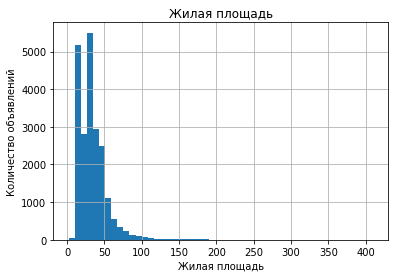

In [6]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['living_area'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['living_area'].describe(),'\n')

#Рассмотрим пропущенные значения более детально.
data[data['living_area'].isnull()].head(15)

#Построим гистограмму
data['living_area'].plot(kind = 'hist',
                        grid = True,
                        bins = 50,
                        title ='Жилая площадь')

plt.xlabel ('Жилая площадь')
plt.ylabel ('Количество объявлений')
plt.show

При анализе гистограммы видно, что больше всего значений жилой зоны находятся в диапазоне от 10 до 50 кв.м., однако есть аномальные значения в промежутке до 10 кв.м. и более 200 кв.м.

В данном параметре мы встречаемся с двумя типами аномалий в значениях:

**Пустые значения:**

Для заполнения пустых значений параметра `living_area` - можем сделать специальную таблицу, в которой будут агрегированы средние значения показателя `living_area` для аналогичных квартир - разбив их на группы в зависимости от количества комнат - параметр `rooms`. 

Для этого необходимо будет добавить столбец с категориями квартир, посчитать среднее значения показателя `living_area` и заполнить пропуски значениями из справочной таблицы.

**Аномально маленькие и большие значения**
Согласно действующим СНиПам, минимальная площадь комнаты должна быть не менее 8 квадратных метров (п. 5.3 СП 5.413330.2011), соответственно все значения меньше данной величины будут являться аномальными.

Что касается аномально больших значений - рассмотрим значения жилой площади более 250 кв.м.

Давайте рассмотрим такие значения

In [7]:
data.query('(living_area < 8)|(living_area > 250)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.0,483.9,2017-10-04T00:00:00,7,3.20,6.0,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
1085,16,75000000.0,323.0,2017-07-10T00:00:00,5,4.00,5.0,255.7,4,NaN,...,66.0,NaN,Санкт-Петербург,23713.0,594.0,3.0,398.0,2.0,515.0,259.0
3242,7,4440000.0,41.0,2017-07-02T00:00:00,1,NaN,17.0,3.0,17,NaN,...,11.0,NaN,Санкт-Петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
4237,1,50000000.0,517.0,2017-10-14T00:00:00,7,NaN,4.0,332.0,3,NaN,...,22.0,NaN,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,...,45.5,1.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12401,20,91500000.0,495.0,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
13915,20,6350000.0,52.0,2018-02-06T00:00:00,2,3.00,6.0,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
14088,8,51000000.0,402.0,2017-02-07T00:00:00,6,3.15,8.0,300.0,6,NaN,...,56.0,2.0,Санкт-Петербург,24484.0,5052.0,1.0,253.0,0.0,NaN,32.0


Как мы видим, в выборку попадают квартиры - студии, в таких квартирах кухня объединяется с жилой комнатой и представляют собой одно помещение. 

В любом случае объявлений с аномально низким размером жилой площади достаточно мало и преимущественно они представлены студиями. Однако в выборку попали 4 квартиры не являющиеся студиями - для этих квартир можно предположить, что в веденных данных были совершены ошибки - например в квартире 139 кв.м площадь жилой зоны, скорее всего составляет 80 кв.м, а не 8.

Таким образом по этим 4 квартирам можно произвести корректировку значения.

Что касается квартир, значения по которым превышают 250 кв.м. - в данном случае общая площадь таких квартир больше жилой, что подразумевает, что объявления корректны - квартиры с такими размерами относятся к ВИП жилью, имеющему большие площади - ошибки здесь нет.

**Вывод по пункту 1.2.1.2  living_area — жилая площадь в квадратных метрах (м²)**

В рамках предобработки данных необходимо:
1. Требуется заменить пропущенные значения медианным значениям в зависимости от категории - тип квартиры и дополнительной таблицы с медианными значениями;
2. Изменить значения жилой площади для больших квартир с низким значением жилой площади (ID:3242, 13915,	21943, 23574).

##### `kitchen_area` — площадь кухни в квадратных метрах (м²)

Рассмотрим данный параметр по аналогии с `living_area'

Количество нулевых значений:
2278 

Общая информация о данных:
count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

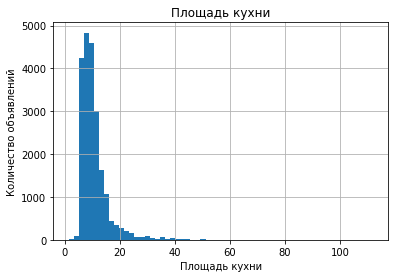

In [8]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['kitchen_area'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['kitchen_area'].describe(),'\n')

#Рассмотрим пропущенные значения более детально.
data[data['kitchen_area'].isnull()].head(15)

#Построим гистограмму
data['kitchen_area'].plot(kind = 'hist',
                        grid = True,
                        bins = 60,
                        title ='Площадь кухни')

plt.xlabel ('Площадь кухни')
plt.ylabel ('Количество объявлений')
plt.show

Согласно полученной информации большинство значений для площади кухни расположены в диапазоне от 5 до 18 кв.м., так как в популяции представлены квартиры студии и квартиры с большой планировкой наличие аномально низких и аномально высоких значений допустимо.

**Вывод по пункту 1.2.1.3  kitchen_area — площадь кухни в квадратных метрах (м²)**

Требуется заменить пропущенные значения медианным значениям в зависимости от категории - тип квартиры и дополнительной таблицы с медианными значениями.

##### `locality_name` — название населённого пункта

Познакомимся более детально с данным параметром:

In [9]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['locality_name'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['locality_name'].describe(),'\n')

#Получим перечень уникальных значений и узнаем их количесво
print(data['locality_name'].unique(),'\n')


#Узнаем количество каждого уникального значения
print('Количество уникальных строк')
print(data['locality_name'].value_counts())

Количество нулевых значений:
49 

Общая информация о данных:
count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object 

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Пон

В данной популяции имеются 49 пустых значений - название локации является одним из ключевых параметров, в связи с этим отсутствие информации является критичным, такие пустые значения необходимо удалить из общей популяции.

В популяции представлены неявные дубликаты, например "посёлок Мурино" и "поселок Мурино" - от таких значений необходимо избавиться приведя их к одной форме.

**Вывод по пункту 1.2.1.4 locality_name — название населённого пункта**

необходимо произвести следующие работы по данному параметру:
1. Удалить 49 пустых значений;
2. Отформатировать неявные дубликаты.

#### Данные, заполняемые людьми - не заполнение которых подразумевает значение:
##### `is_apartment` — апартаменты (булев тип)

Рассмотрим детально данный параметр:

In [10]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['is_apartment'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['is_apartment'].describe(),'\n')

#Получим перечень уникальных значений и узнаем их количесво
print('Список уникальных значений:')
print(data['is_apartment'].unique(),'\n')


#Узнаем количество каждого уникального значения
print('Количество уникальных строк')
print(data['is_apartment'].value_counts())

Количество нулевых значений:
20924 

Общая информация о данных:
count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object 

Список уникальных значений:
[nan False True] 

Количество уникальных строк
False    2725
True       50
Name: is_apartment, dtype: int64


В данном параметре достаточно большое количество незаполненных данных. 

Возможно два варианта:
1. Убрать данный параметр из популяции;
2. Присвоить значения самостоятельно.

Исходя из общего понимания рынка недвижимости, большинство объявлений представляют собой обычные квартиры, при это пользователи при заполнении могли не проставить данный пункт, так как подразумевали, что их квартиры не являются апартаментами.

**Вывод по параметру 1.2.2.1  is_apartment — апартаменты (булев тип)**

Таким образом, для корректного заполнения - всем пустым значениям мы присвоим значение `False`.
Также для данного параметра необходимо будет произвести замена типа данных с `object` на `bool`, так как значения либо удовлетворяют определению апартаменты, либо нет.

##### `balcony` — число балконов

Рассмотрим детально данный параметр:

Количество нулевых значений:
11519 

Общая информация о данных:
count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64 

Список уникальных значений:
[nan  2.  0.  1.  5.  4.  3.] 

Количество уникальных строк
1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

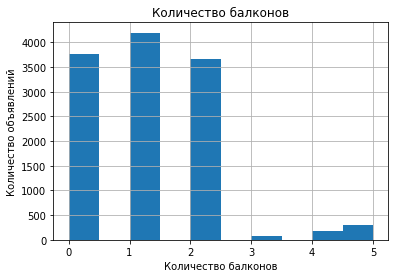

In [11]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['balcony'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['balcony'].describe(),'\n')

#Получим перечень уникальных значений и узнаем их количесво
print('Список уникальных значений:')
print(data['balcony'].unique(),'\n')


#Узнаем количество каждого уникального значения
print('Количество уникальных строк')
print(data['balcony'].value_counts())

#Построим гистограмму
data['balcony'].plot(kind = 'hist',
                        grid = True,
                        bins = 10,
                        title ='Количество балконов')

plt.xlabel ('Количество балконов')
plt.ylabel ('Количество объявлений')
plt.show

Из проведенного анализа видно, что большинство квартир либо не имеют балкон, либо имеют 1 или 2 балкона, также имеются квартиры с 3, 4 и 5 балконами

В данном случае отсутствие значения - подразумевает, что количество балконов равно 0, то есть балкон отсутствует.

**Вывод по параметру 1.2.2.2  balcony — число балконов**

Пустые значения необходимо заполнить числом 0, что будет подразумевать отсутствие у квартиры балкона.

#### Данные, заполняемые автоматически на основе геодезических данных.

Система автоматически заполняет данные на основе геодезической метки адреса, если система не присваивает значения, то скорее всего в ближайшем расстоянии запрашиваемых объектов нет.

Таким образом, для параметров: 
- airports_nearest;
- cityCenters_nearest;
- parks_nearest;
- ponds_nearest.

в случае отсутствия значения, необходимо применить показатель "Неприменимо", но это приведет к тому, что изменится тип данных с `float64` на `object`, и с данным типом данных нельзя будет проводить математические операции.

таким образом для данных параметров лучше оставить значение `NaN` понимая при этом, что данный параметр для такого объявления неприменим.

Однако более детально рассмотрим параметр `airports_nearest`

Количество нулевых значений:
5542 

Общая информация о данных:
count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

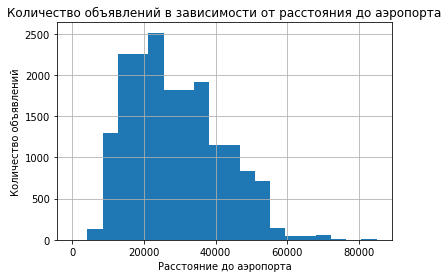

In [12]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['airports_nearest'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['airports_nearest'].describe(),'\n')

#Построим гистограмму
data['airports_nearest'].plot(kind = 'hist',
                        grid = True,
                        bins = 20, title = 'Количество объявлений в зависимости от расстояния до аэропорта')

plt.xlabel ('Расстояние до аэропорта')
plt.ylabel ('Количество объявлений')
plt.show

Из анализа видно, что есть квартиры, находящиеся в непосредственной близости к аэропорту (а это невозможно).
Вблизи аэропорта не должны располагаться жилые здания, рассмотрим все квартиры в радиусе 6 км.

In [13]:
data.query('airports_nearest < 6000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Таким образом было выяснено что в непосредственной близости к аэропорту есть одна квартира - ее необходимо удалить из популяции, более в пределах 6 км квартир нет

Что касается параметров:
- parks_around3000;
- ponds_around3000;

для данных параметров отсутствие значения подразумевает 0 - т.е. нет в доступности 3 км.

**Вывод по автоматическим параметрам на основе геодезических данных"**

1. По ряду параметров мы оставляем значение `NaN` понимая, что для таких объявлений это обозначает - неприменимо.
2. Для ряда параметров произведем замену `NaN` на 0.

### Параметры с некорректным типом данных

Можно однозначно выделить два параметра, тип данных по которым представлен неправильно и требует замены:
1. `is_apartment` - значения в данном параметре должны быть типом `bool` - о чем более детально написано в анализе данного параметра (п. 1.2.2.1);
2. `first_day_exposition` - является форматом даты - для него необходимо присвоить тип `datetime`

### Анализ параметров на наличие аномальных значений

В рамках данного блока будут проанализированы параметры, на наличие аномальных значений.

Были выделены следующие параметры для анализа:
- `total_area` — общая площадь квартиры в квадратных метрах (м²);
- `last_price` — цена на момент снятия с публикации;
- `rooms` — число комнат;
- `floor` — этаж;
- `floors_total` — всего этажей в доме;

#### `total_area` — общая площадь квартиры в квадратных метрах (м²)

Ознакомимся с основными деталями данного параметра:

In [14]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['total_area'].describe(),'\n')

Общая информация о данных:
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64 



Из данных видно, что минимальное значение для квартиры составляет 12 кв.м, максимальное - 900 кв.м.

Данные значения являются аномальными, давайте рассмотрим самые маленькие и самые большие квартиры детально.

In [15]:
data.query('(total_area<20)').sort_values(by = 'total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.00,2017-07-19T00:00:00,1,2.55,5.0,10.00,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
19807,0,3800000.0,13.00,2018-07-04T00:00:00,1,NaN,5.0,10.00,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19546,3,1850000.0,13.00,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
17961,3,1400000.0,13.00,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19558,2,1686000.0,13.20,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
19642,5,1190000.0,14.00,2018-07-29T00:00:00,1,NaN,5.0,11.00,1,NaN,...,2.0,NaN,Санкт-Петербург,9898.0,11122.0,0.0,NaN,0.0,NaN,4.0
12040,5,1900000.0,15.00,2018-06-27T00:00:00,1,2.50,5.0,NaN,1,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
16949,9,1550000.0,15.00,2018-08-21T00:00:00,1,2.70,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,51048.0,16376.0,0.0,NaN,1.0,1079.0,42.0
8886,10,2450000.0,15.50,2018-08-22T00:00:00,0,NaN,5.0,10.00,2,NaN,...,NaN,NaN,Санкт-Петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,5,2100000.0,16.00,2017-12-10T00:00:00,0,NaN,6.0,13.00,1,NaN,...,NaN,NaN,Санкт-Петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0


В выборке представлено 27 квартир - студий(комнат), с площадь менее 20 кв.м. - данные значения являются аномальными и лучше будет их удалить из выборки

In [16]:
data.query('(total_area>180)').sort_values(by = 'total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6247,8,9600000.0,180.1,2017-03-07T00:00:00,4,2.75,2.0,100.00,2,NaN,...,19.50,1.0,Зеленогорск,73547.0,54646.0,0.0,NaN,1.0,1037.0,496.0
12567,19,22000000.0,180.6,2015-03-25T00:00:00,5,2.80,7.0,140.00,2,NaN,...,30.00,NaN,Санкт-Петербург,24324.0,5038.0,0.0,NaN,0.0,NaN,NaN
9951,11,16550000.0,180.6,2017-07-14T00:00:00,3,3.50,10.0,83.50,10,NaN,...,48.00,1.0,Санкт-Петербург,39892.0,15176.0,0.0,NaN,0.0,NaN,NaN
4812,1,27933600.0,180.8,2014-11-27T00:00:00,4,3.10,16.0,94.89,11,NaN,...,20.16,0.0,Санкт-Петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,586.0
10624,19,55969724.0,181.0,2017-07-10T00:00:00,4,3.00,8.0,100.23,4,NaN,...,15.62,2.0,Санкт-Петербург,27124.0,7463.0,3.0,318.0,2.0,509.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.00,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.00,5,NaN,...,70.00,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.00,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.30,4,NaN,...,19.50,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN


Также в выборке представлено 310 квартир с общей площадью более 180 кв.м., данные квартиры также являются аномальными и их необходимо убрать из выборки.

<function matplotlib.pyplot.show(close=None, block=None)>

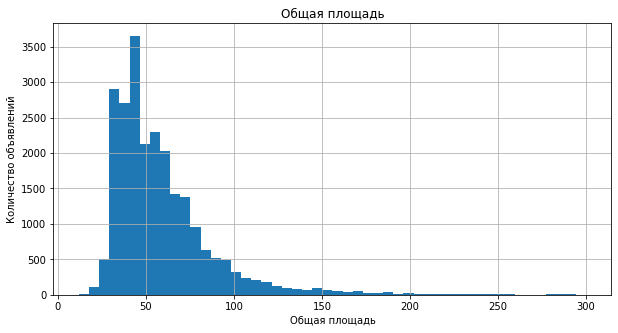

In [17]:
# Построим гистограмму по анализируемым данным
data['total_area'].plot(kind = 'hist', grid = True, figsize = (10,5), bins = 50, range = (12, 300), title = 'Общая площадь')
plt.xlabel ('Общая площадь')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру `total_area` — общая площадь квартиры в квадратных метрах (м²)**

Основное распределение квартир по параметру "площадь квартиры" находится в диапазоне от 20 до 180 кв.м., прочие выбросы рекомендуется удалить в рамках этапа предобработки данных.


#### `last_price` — цена на момент снятия с публикации;

Ознакомимся с данными в отношении цен для построения понимания данного параметра

In [18]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['last_price'].describe(),'\n')

#Проанализируем 10 минимальных значений
data.sort_values(by ='last_price').head (10)

Общая информация о данных:
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,...,NaN,NaN,деревня Вахнова Кара,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,...,5.8,NaN,городской посёлок Будогощь,NaN,NaN,NaN,NaN,NaN,NaN,233.0
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,NaN,3.0,NaN,3,NaN,...,NaN,NaN,поселок Совхозный,NaN,NaN,NaN,NaN,NaN,NaN,45.0
18867,1,470000.0,41.0,2018-02-11T00:00:00,1,NaN,5.0,32.0,3,NaN,...,9.0,NaN,деревня Выскатка,NaN,NaN,NaN,NaN,NaN,NaN,46.0


In [19]:
#Проанализируем 10 максимальных значений
data.sort_values(by ='last_price').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8900,13,190870000.0,268.0,2016-03-25T00:00:00,3,NaN,8.0,132.0,7,NaN,...,40.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,901.0
5893,3,230000000.0,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
16461,17,245000000.0,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


В популяции представлено одно аномальное объявление с ценой продаж равное 12 190 руб и более 30объявление с ценной более 100 000 000 млн рублей.

**Вывод по параметру last_price — цена на момент снятия с публикации**

В рамках предобработки данных необходимо удалить аномально низкое значение из популяции.

#### `rooms` — число комнат;

Рассмотрим детально данный параметр:

Общая информация о данных:
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

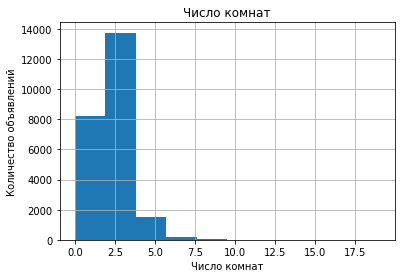

In [20]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['rooms'].describe(),'\n')

#Построим гистограмму по анализируемым данным
data['rooms'].plot(kind = 'hist', grid = True, bins = 10, title = 'Число комнат')

plt.xlabel ('Число комнат')
plt.ylabel ('Количество объявлений')
plt.show

В данных минимальное значение составляет 0, а максимальное значение - 19. Согласно гистограмме - больше всего в популяции представлено 1-4 комнатных квартир, прочие значения являются скорее исключениями.

Более детально рассмотрим значения с показателем `0` - скорее всего это квартиры студии, либо квартиры имеющие открытые планировки.

In [21]:
data.query('rooms == 0 and total_area >35 and open_plan == False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3458,6,7400000.0,73.6,2017-05-18T00:00:00,0,NaN,3.0,50.00,1,NaN,...,NaN,0.0,Санкт-Петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0
9052,12,3890000.0,38.3,2017-10-06T00:00:00,0,2.7,14.0,24.42,7,NaN,...,NaN,2.0,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,289.0
10008,20,5050000.0,44.2,2017-09-14T00:00:00,0,2.7,9.0,32.20,1,NaN,...,NaN,NaN,Санкт-Петербург,24329.0,5955.0,0.0,NaN,2.0,520.0,69.0
13613,16,8100000.0,58.4,2019-04-26T00:00:00,0,3.3,7.0,33.00,6,NaN,...,NaN,NaN,Санкт-Петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN
15319,4,5970000.0,43.3,2017-07-20T00:00:00,0,2.8,9.0,28.20,2,NaN,...,NaN,2.0,Санкт-Петербург,23617.0,5223.0,0.0,NaN,1.0,874.0,30.0
16130,14,5000000.0,42.1,2018-04-13T00:00:00,0,NaN,20.0,30.00,10,NaN,...,NaN,NaN,Санкт-Петербург,50605.0,15933.0,0.0,NaN,0.0,NaN,170.0
20082,10,16300000.0,98.4,2017-11-08T00:00:00,0,3.1,5.0,60.50,2,NaN,...,NaN,NaN,Санкт-Петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.00,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


**Вывод по параметру rooms — число комнат**

Согласно проведенному анализу в выборке есть несколько квартир не имеющих свободной планировки с количеством комнат 0, при этом не являющихся квартирами - студиями. Их количество несущественно - дополнительные действия не требуются

Также представлены несколько значений с аномально большим количеством комнат - от 10 и более, это единичные случаи, которые не должны затронуть анализ, в связи с этим данные объявления будут оставлены в выборке.

#### `floor` — этаж

Рассмотрим данный параметр:

Общая информация о данных:
count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

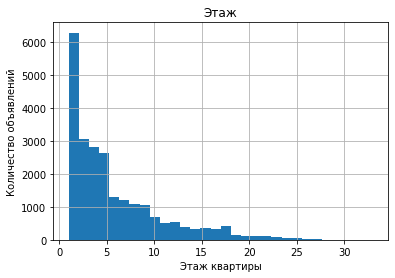

In [22]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['floor'].describe(),'\n')

#Построим гистограмму по анализируемым данным
data['floor'].plot(kind = 'hist', grid = True, bins = 30, title = 'Этаж')

plt.xlabel ('Этаж квартиры')
plt.ylabel ('Количество объявлений')
plt.show

Убедимся, что в квартирах расположеных на высоких этажах (выше 27) количесто этажей итого совпадает либо больше.

In [23]:
data.query('floor > 27').sort_values(by = 'floor')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
397,15,5990000.0,54.0,2018-03-22T00:00:00,2,NaN,36.0,21.4,28,NaN,...,18.7,1.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0
11079,16,9200000.0,75.0,2019-02-22T00:00:00,2,2.7,36.0,40.0,29,NaN,...,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
1917,13,10150000.0,74.0,2017-11-17T00:00:00,2,2.8,35.0,34.4,30,NaN,...,13.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
18629,20,5700000.0,54.0,2017-12-08T00:00:00,1,NaN,35.0,21.0,31,NaN,...,18.0,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,128.0
11575,9,9900000.0,101.0,2016-04-28T00:00:00,3,NaN,33.0,53.0,32,False,...,21.0,0.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,53.0
18218,4,9900000.0,101.0,2018-09-27T00:00:00,3,NaN,35.0,53.4,33,NaN,...,13.7,2.0,Санкт-Петербург,18737.0,20450.0,0.0,NaN,3.0,72.0,7.0


**Вывод по параметру floor — этаж**

Распределение квартир на этажах больше всего представлено начиная с 1 по 5-й этаж, при этом есть аномальные значения  - 28 и выше, однако мы убедились, что данные с данными квартирами все корректно, причем, судя по параметру `cityCenters_nearest` - эти квартиры расположены в одном здании.

Данные корректны и предобработка по ним не требуется.

#### `floors_total` — всего этажей в доме;

Рассмотрим данный параметр:

Общая информация о данных:
count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

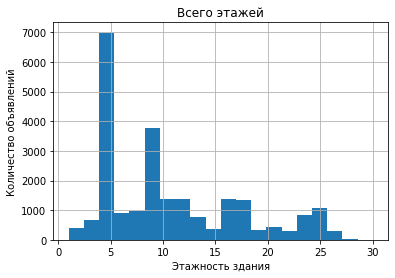

In [24]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['floors_total'].describe(),'\n')

#Построим гистограмму по анализируемым данным
data['floors_total'].plot(kind = 'hist', grid = True, bins = 20, range = (1,30), title = 'Всего этажей')

plt.xlabel ('Этажность здания')
plt.ylabel ('Количество объявлений')
plt.show

В представленных данных квартиры расположенны чаще в пятиэтажных домах, на втором месте находятся 10 этажные дома.

При этом в популяции имеется аномальное значение - максимальная этажность здания составляет 60 этажей, давайте рассмотрим данную аномалию.

In [25]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,NaN,...,7.4,NaN,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


Имеются два аномальных значения с этажностью зданий - 60 и 52, их необходимо убрать из популяции.

**Вывод по параметру floors_total — всего этажей в доме**

На этапе предобработки данных необходимо будет удалить 2 аномальных значения из популяции.

### Вывод по блоку Анализ данных

На основе проведенного анализа данных был составлен план по обработке данных для основных параметров. Детали представлены ниже:

**1. Работа с пропусками:**

`ceiling_height` — высота потолков (м) 
- Заполнить пропуски медианным значением;
- Для аномальных значений ввести правильное обозначение (например "28" > "2.8")
- Удалить из таблицы аномальные значения(Высота потолков ниже 2м, и более 6м)

`living_area` — жилая площадь в квадратных метрах (м²)
- Заполнить пропуски медианными значением (на основе новой таблицы с категориями жилых квартир);
- Изменить значения жилой площади для больших квартир с низким значением жилой площади (ID:3242, 13915, 21943, 23574).

`kitchen_area` — площадь кухни в квадратных метрах (м²)
- Заполнить пропуски медианными значением (на основе новой таблицы с категориями жилых квартир);

`locality_name` — название населённого пункта
- Удалить пустые значения в которых не указаны наименования населенного пункта;
- Произвести замену неявных дубликатов.

`is_apartment`— апартаменты (булев тип)
- Для всех пустых значений присваиваем значение *False*

`balcony` — число балконов
- Для всех пустых значений присваиваем значение 0.

`airports_nearest` - расстояние до аэропорта
- Имеется аномальное значение расположенное в непосредственной близости, его необходимо удалить

`parks_around3000` и `ponds_around3000`
- Для всех пустых значений присваиваем значение 0.

**2. Некорректный тип данных:**
Необходимо произвести замену для параметров:
- `is_apartment` на *bool*
- `first_day_exposition` на *datetime*

**3. Работа с аномальными значениями:**

`total_area` — общая площадь квартиры в квадратных метрах (м²)
- необходимо удалить выбросы квартир до 20 и после 200

`last_price` — цена на момент снятия с публикации
- необходимо удалить значения со стоимостью 12 190

`rooms` — число комнат
- квартиры в которых более 10 комнат, также являются выбросами.

`floors_total` — всего этажей в доме
- в популяции представлены две квартиры расположенные в зданиях в которых более 50 этажей, при - это аномальные значения и их необходимо удалить из популяции.

## Предобработка данных

В блоке **Анализ данных** был сформирован план действий для приведения данных к нормальному виду.

В данном блоке в первую очередь будет выполнено преобразование данных на основе имеющегося плана.

### Обработка значений выявленных в рамках Анализа данных

На основе изложенного плана проведем замену пропусков на основе изложенного плана.

#### `ceiling_height` — высота потолков (м)
- Заполнить пропуски медианным значением;
- Для аномальных значений ввести правильное обозначение (например "28" > "2.8")
- Удалить из таблицы аномальные значения (Высота потолков ниже 2м, и более 6м)

In [26]:
#Заполним пропуски медианным значением
#создадим переменную включающую в себя медианное значения параметра ceiling_height

ceiling_height_median = data['ceiling_height'].median()

#выведем результат на экран
print (f'Медианное значение для параметра ceiling_height равно: {ceiling_height_median}')

#заменим все пустые значения на новую переменную и выведем количество пустых строк
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
data['ceiling_height'].isna().value_counts()

Медианное значение для параметра ceiling_height равно: 2.65


False    23699
Name: ceiling_height, dtype: int64

In [27]:
#Для аномальных значанений ввести правильное обозначение (например "28" > "2.8")
#Создадим список значений, которые занесены по ошибке и сохраним в отдельную переменную
ceiling_height_unique = data.query('20 <ceiling_height <60')
ceiling_height_unique = ceiling_height_unique ['ceiling_height'].unique ()

#Выведем на экран
print(ceiling_height_unique)

[25.  32.  27.  24.  26.  22.6 27.5]


In [28]:
#Создадим список соответствующие корректным значением
ceiling_height_replace = [2.5, 3.2, 2.7, 2.4, 2.6, 2.3, 2.8]

# Произведем замену функцией .replace()
data['ceiling_height']=data['ceiling_height'].replace(ceiling_height_unique, ceiling_height_replace)

# Убедимся, что замена сработала
data.query ('20 <ceiling_height <60')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [29]:
#Удалить из таблицы аномальные значения(Высота потолков ниже 2м, и более 6м)
data = data.query('ceiling_height >= 2 and ceiling_height <= 6')

# убедимся, что в таблице не осталось значений меньше 2 и больше 6.
data.query('ceiling_height < 2 and ceiling_height > 6')



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### `living_area` — жилая площадь в квадратных метрах (м²)

- Заполнить пропуски медианными значением (на основе новой таблицы с категориями жилых квартир);
- Изменить значения жилой площади для больших квартир с низким значением жилой площади (ID:3242, 13915, 21943, 23574).

Однако для начала нам необходимо создать новый столбец с категорией квартиры в зависимости от комнат. Создадим новый столбец `flat_category` в котором укажем категорию квартиры исходя из градации:

Комнат : 0 Категория: Студия
Комнат : 1 Категория: 1-комнатная
Комнат : 2 Категория: 2-комнатная
Комнат : 3 Категория: 3-комнатная
Комнат : 4 Категория: 4-комнатная
Комнат : 5 и более Категория: Многокомнатная

In [30]:
#Напишем функцию, которая будет генерировать значения в зависимости от параметра rooms
def i(row):
    if row['rooms'] == 0:
        val ='студия'
    elif row['rooms'] == 1:
        val = '1-комнатная'
    elif row['rooms'] == 2:
        val = '2-комнатная'
    elif row['rooms'] == 3:
        val = '3-комнатная'        
    elif row['rooms'] == 4:
        val = '4-комнатная'
    else:
        val = 'Многокомнатная'
    return val

#Добавим значения в датафрейм
data['flat_category'] = data.apply (i, axis = 1)

#Создадим сводную таблицу и получим медианное значение для параметров "living_area" и "kitchen_area"
living_kitchen_area_pivot = data.pivot_table(index ='flat_category',
                             values = ('living_area', 'kitchen_area'),
                             aggfunc = 'median')

#Рассмотрим полученное значение
living_kitchen_area_pivot.columns = ['kitchen_area_median','living_area_median']

#Рассмотрим полученное значение
living_kitchen_area_pivot

,kitchen_area_median,living_area_median
flat_category,,
1-комнатная,9.05,17.6
2-комнатная,8.80,30.5
3-комнатная,9.50,45.0
4-комнатная,11.10,63.6
Многокомнатная,17.00,104.8
студия,NaN,18.0


In [31]:
#Добавим полученные значения к текущему дата фрейму и заполним пустые значения 
data = data.merge(living_kitchen_area_pivot, on='flat_category')

data['living_area'] = data['living_area'].fillna(data['living_area_median'])

#Убедимся, что нулевые значения отсутствуют
data['living_area'].isnull().value_counts()

False    23688
Name: living_area, dtype: int64

In [32]:
#Изменить значения жилой площади для больших квартир с низким значением жилой площади.
#Создадим отдельный список с уникальным значениями жилой площади.
living_area_unique = data.query('living_area <8 and total_area > 40')
living_area_unique = living_area_unique['living_area'].unique()
print (living_area_unique)

[3.  2.  5.4]


In [33]:
#Создадим список соответствующие корректным значением
living_area_replace = [30, 20, 54]

# Произведем замену функцией .replace()
data['living_area']=data['living_area'].replace(living_area_unique, living_area_replace)

# Убедимся, что замена сработала
data.query ('living_area <8 and total_area > 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_category,kitchen_area_median,living_area_median


#### `kitchen_area` — площадь кухни в квадратных метрах (м²)

По аналогии с параметром `living_area` заменим пустые значения из столбца `kitchen_area_median`. Однако для квартир-студий параметр площадь кухни не совсем релевантен, так как по факту кухни в них нету, и ее располагают в жилой комнате. В связи с этим для квартир-студий параметр `kitchen_area` оставим незаполненным.

In [34]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area_median'])

#Посчитаем количество квартир-студий и убедимся, что пустые значения имеют только они
print('Количество студий в выборке:')
print (data.query('flat_category == "студия"')['flat_category'].count())

#Убедимся, что нулевые значения отсутствуют
data['kitchen_area'].isnull().value_counts()



Количество студий в выборке:
197


False    23491
True       197
Name: kitchen_area, dtype: int64

In [35]:
#Удалим ненужные столбцы из датафрейма
data = data.drop(columns =['kitchen_area_median', 'living_area_median'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23688 entries, 0 to 23687
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23688 non-null  int64  
 1   last_price            23688 non-null  float64
 2   total_area            23688 non-null  float64
 3   first_day_exposition  23688 non-null  object 
 4   rooms                 23688 non-null  int64  
 5   ceiling_height        23688 non-null  float64
 6   floors_total          23602 non-null  float64
 7   living_area           23688 non-null  float64
 8   floor                 23688 non-null  int64  
 9   is_apartment          2773 non-null   object 
 10  studio                23688 non-null  bool   
 11  open_plan             23688 non-null  bool   
 12  kitchen_area          23491 non-null  float64
 13  balcony               12175 non-null  float64
 14  locality_name         23639 non-null  object 
 15  airports_nearest   

#### `locality_name` — название населённого пункта

- Удалить пустые значения в которых не указаны наименования населенного пункта;
- Произвести замену неявных дубликатов.

In [36]:
#Удалить пустые значения в которых не указаны наименования населенного пункта

data = data.dropna(subset = ['locality_name']) 
data['locality_name'].isnull().value_counts()

False    23639
Name: locality_name, dtype: int64

In [37]:
#Произвести замену неявных дубликатов
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

locality_name_unique = data['locality_name'].unique()
#колличество неявных дубликатов
len(locality_name_unique)

323

In [38]:
#Рассмотрим список внимательнее
locality_name_unique

#Заменим дубликаты для "Кудрово" и "Мурино"
data['locality_name'] = data['locality_name'].where(data['locality_name'] !='поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].where(data['locality_name'] !='деревня Кудрово', 'Кудрово')

locality_name_unique = data['locality_name'].unique()
#колличество неявных дубликатов
len(locality_name_unique)

321

#### `is_apartment`— апартаменты (булев тип)

- Для всех пустых значений присваиваем значение False

In [39]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isnull().value_counts()

False    23639
Name: is_apartment, dtype: int64

#### `balcony` — число балконов

- Для всех пустых значений присваиваем значение 0.

In [40]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().value_counts()

False    23639
Name: balcony, dtype: int64

#### `parks_around3000` и `ponds_around3000`

- Для всех пустых значений присваиваем значение 0.

In [41]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isnull().value_counts()

False    23639
Name: parks_around3000, dtype: int64

In [42]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isnull().value_counts()

False    23639
Name: ponds_around3000, dtype: int64

**Вывод:**

Все неявные дубликаты согласно плану были устранены.

### Изменения типа данных

Необходимо произвести замену для параметров:

- `is_apartment` на bool
- `first_day_exposition` на datetime

In [43]:
#is_apartment на bool

data['is_apartment'].astype('bool')

0        False
1        False
2        False
3        False
4        False
         ...  
23683    False
23684    False
23685    False
23686    False
23687    False
Name: is_apartment, Length: 23639, dtype: bool

In [44]:
#first_day_exposition - сначала необходимо перевести в стандартный формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2015-07-24
2       2017-02-26
3       2017-11-23
4       2019-01-09
           ...    
23683   2017-09-01
23684   2017-09-28
23685   2018-09-07
23686   2017-11-11
23687   2018-06-26
Name: first_day_exposition, Length: 23639, dtype: datetime64[ns]

**Вывод:**

Все неверные типы данных были поправлены.

### Работа с аномальными значениями:

#### `total_area` — общая площадь квартиры в квадратных метрах (м²)

- необходимо удалить выбросы квартир до 20 и после 200 кв.м.

In [45]:
#Сформируем условия отбора
data=data.query('total_area <= 180 and  total_area >= 20')

#### `last_price` — цена на момент снятия с публикации

-необходимо удалить значения со стоимостью 12 190

In [46]:
#Сформируем условия отбора
data=data.query('last_price > 100000')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23301 entries, 0 to 23687
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23301 non-null  int64         
 1   last_price            23301 non-null  float64       
 2   total_area            23301 non-null  float64       
 3   first_day_exposition  23301 non-null  datetime64[ns]
 4   rooms                 23301 non-null  int64         
 5   ceiling_height        23301 non-null  float64       
 6   floors_total          23217 non-null  float64       
 7   living_area           23301 non-null  float64       
 8   floor                 23301 non-null  int64         
 9   is_apartment          23301 non-null  bool          
 10  studio                23301 non-null  bool          
 11  open_plan             23301 non-null  bool          
 12  kitchen_area          23113 non-null  float64       
 13  balcony         

#### `rooms` — число комнат

- квартиры в которых более 10 комнат, также являются выбросами.

In [47]:
#квартиры в которых более 10 комнат, также являются выбросами
data=data.query('rooms < 10')

#### `floors_total` — всего этажей в доме

- в популяции представлены две квартиры расположенные в зданиях в которых более 50 этажей, при - это аномальные значения и их необходимо удалить из популяции.

In [48]:
data=data.query('floors_total <= 50')

#### `airports_nearest` - расстояние до аэропорта
- имеется аномальное значение расположенное в непосредственной близости, его необходимо удалить

In [49]:
data = data.query('airports_nearest != 0')


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23214 entries, 0 to 23687
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23214 non-null  int64         
 1   last_price            23214 non-null  float64       
 2   total_area            23214 non-null  float64       
 3   first_day_exposition  23214 non-null  datetime64[ns]
 4   rooms                 23214 non-null  int64         
 5   ceiling_height        23214 non-null  float64       
 6   floors_total          23214 non-null  float64       
 7   living_area           23214 non-null  float64       
 8   floor                 23214 non-null  int64         
 9   is_apartment          23214 non-null  bool          
 10  studio                23214 non-null  bool          
 11  open_plan             23214 non-null  bool          
 12  kitchen_area          23029 non-null  float64       
 13  balcony         

**Вывод:**
    
Работа с аномальными значениями проведена

### Посчитайте и добавьте в таблицу новые столбцы

Для проведения исследования необходимо добавить в таблицу дополнительные столбцы:

`cost_1sqm` - цена одного квадратного метра;

`publication_day` - день публикации объявления (0 - понедельник, 1 - вторник и т.д.);

`publication_month`- месяц публикации объявления;

`publication_year` - год публикации объявления;

`floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);

`center_distance_km` - расстояние в км до центра города;

Для расчета параметра `cost_1sqm` - цена одного квадратного метра - необходимо разделить цену квартиры на общую площадь.

In [51]:
data['cost_1sqm'] = data['last_price']/data['total_area']
data['cost_1sqm'].head()

0    120370.370370
1    408176.100629
2     88524.590164
3     81707.317073
4    117355.371901
Name: cost_1sqm, dtype: float64

Рассчитаем все параметры связанные с датой и временем

In [52]:
#`publication_day` - день публикации объявления воспользуемся методом `.dt.weekday()`
data['publication_day'] = data['first_day_exposition'].dt.weekday

#`publication_month`- месяц публикации объявления;
data['publication_month'] = data['first_day_exposition'].dt.month

#`publication_year` - год публикации объявления;
data['publication_year'] = data['first_day_exposition'].dt.year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,flat_category,cost_1sqm,publication_day,publication_month,publication_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,3-комнатная,120370.370370,3,3,2019
1,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,2.0,84.0,3.0,234.0,424.0,3-комнатная,408176.100629,4,7,2015
2,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,0.0,NaN,289.0,3-комнатная,88524.590164,6,2,2017
3,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,3.0,420.0,0.0,NaN,397.0,3-комнатная,81707.317073,3,11,2017
4,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,...,0.0,NaN,0.0,NaN,97.0,3-комнатная,117355.371901,2,1,2019


Для параметра `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»), необходимо написать цикл:

Если этаж 1 - присвоить "первый";

Если параметр `floors_total` == `floor` - присвоить "последний"

Если оба условия не выполняются - присвоить "другой"

In [53]:
#Напишем функцию
def floor_type_funс(row):
    if row['floor'] == 1:
        val = 'первый'
    elif row['floor'] == row['floors_total']:
        val = 'последний'
    else: 
        val = 'другой'
    return val

#Добавим значения в датафрейм
data['floor_type'] = data.apply (floor_type_funс, axis = 1)

#Проверим работу цикла
data['floor_type'].value_counts()

другой       17108
последний     3231
первый        2875
Name: floor_type, dtype: int64

Для параметра `center_distance_km` - расстояние в км до центра города - разделим значение параметра `cityCenters_nearest` на 1000 и округлим вверх - это необходимо для корректного проведения исследования №4

In [54]:
data['center_distance_km'] = (data['cityCenters_nearest']/1000).apply(np.ceil)

#Проверим результат
data['center_distance_km'].head(10)



0    17.0
1     7.0
2    16.0
3    11.0
4    13.0
5    20.0
6    12.0
7    12.0
8    13.0
9    13.0
Name: center_distance_km, dtype: float64

**Вывод** 

Необходимые для исследования колонки добавлены.

### Анализ новых параметров
В рамках проекта необходимо проанализировать 3 новых параметра:

- `publication_month` - месяц публикации объявления;

- `publication_year` - год публикации объявления;

- `floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);

#### `publication_month` - месяц публикации объявления

Для данного параметра запросим общую информацию методом `.describe`, а также построим гистограмму для определения как в течении года распределены объявления

Общая информация о данных:
count    23214.000000
mean         6.400362
std          3.492631
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64 



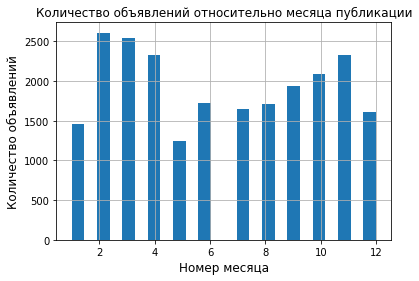

In [55]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['publication_month'].describe(),'\n')

#Построим гистограмму

data['publication_month'].plot(kind = 'hist',title = 'Количество объявлений относительно месяца публикации', bins = 24, grid = True)
plt.xlabel('Номер месяца', size=12)
plt.ylabel('Количество объявлений', size=12)

plt.show()

**Вывод по параметру publication_month - месяц публикации объявления**

Больше всего объявлений приходится на февраль, март, апрель и ноябрь. В свою очередь самый непопулярный месяц - май.

#### `publication_year` - год публикации объявления

Проведем исследование по аналогии с предыдущим пунктом.

Общая информация о данных:
count    23214.000000
mean      2017.375162
std          1.035029
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: publication_year, dtype: float64 



<function matplotlib.pyplot.show(close=None, block=None)>

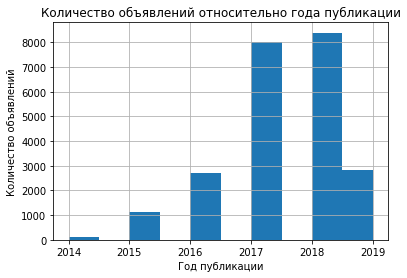

In [56]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['publication_year'].describe(),'\n')

#Построим гистограмму
data['publication_year'].plot(kind = 'hist',title = 'Количество объявлений относительно года публикации', bins = 10, grid = True)
plt.xlabel ('Год публикации')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру publication_year - год публикации объявления**

Согласно проведенному анализу - у нас находится база объявлений за период 2014-2019 года. Причем из графика видно, что c каждым годом число размещения объявлений на портале растет. Сокращение объявлений в 2019 году объясняется тем, что данные за 2019 год предоставлены вплоть по май 2019 года

#### `floor_type` - тип этажа квартиры

Рассмотрим детальнее данный параметр

Общая информация о данных:
count      23214
unique         3
top       другой
freq       17108
Name: floor_type, dtype: object 

Количество значений:
другой       17108
последний     3231
первый        2875
Name: floor_type, dtype: int64 



<function matplotlib.pyplot.show(close=None, block=None)>

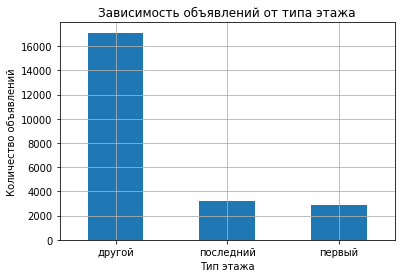

In [57]:
#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['floor_type'].describe(),'\n')

#Рассмотрим сколько значений приходится на каждый тип:
print('Количество значений:')
print(data['floor_type'].value_counts(),'\n')

#Построим столбчатую диаграмму
data['floor_type'].value_counts().plot(kind = 'bar',title = 'Зависимость объявлений от типа этажа', grid = True)
plt.xticks(rotation=0)

plt.xlabel ('Тип этажа')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру floor_type - тип этажа квартиры**

Больше всего квартир расположены между первым и последним этажом. Число квартир расположенных на первом этаже относительно равно числу квартир расположенных на последнем

### Выводы по блоку "Предобработка данных"

В рамках данного блока была произведена предобработка данных согласно полученному плану.

Также были добавлены столбцы, которые необходимы для исследования данных, а именно:

`cost_1sqm` - цена одного квадратного метра;

`publication_day` - день публикации объявления (0 - понедельник, 1 - вторник и т.д.);

`publication_month`- месяц публикации объявления;

`publication_year` - год публикации объявления;

`floor_type` - тип этажа квартиры (значения — «первый», «последний», «другой»);

`center_distance_km` - расстояние в км до центра города;

Для столбцов были рассчитаны соответствующие данные и проведен анализ.

Информация для проведения исследования подготовлена

## Проведите исследовательский анализ данных

### Анализ обработанных данных

После проведения этапа по предобработке данных, рассмотрим общую информацию о датафрейме, а также обработанные параметры, необходимые для исследований.
Проанализируем следующие параметры:

- `total_area`- общая площадь 
- `living_area`- жилая площадь 
- `kitchen_area`- площадь кухни 
- `last_price`- цена объекта 
- `rooms`- количество комнат 
- `ceiling_height`- высота потолков 
- `floor`- этаж квартиры 
- `floor_type`- тип этажа квартиры («первый», «последний», «другой») 
- `floors_total`- общее количество этажей в доме 
- `cityCenters_nearest`- расстояние до центра города в метрах 
- `airports_nearest`- расстояние до ближайшего аэропорта 
- `parks_nearest`- расстояние до ближайшего парка 
- `publication_day`- день публикации объявления 
- `publication_month`- месяц публикации объявления 

Выведем на экран общую информацию и первые 15 строк датафрейма

In [58]:
print (data.info())

data.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23214 entries, 0 to 23687
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23214 non-null  int64         
 1   last_price            23214 non-null  float64       
 2   total_area            23214 non-null  float64       
 3   first_day_exposition  23214 non-null  datetime64[ns]
 4   rooms                 23214 non-null  int64         
 5   ceiling_height        23214 non-null  float64       
 6   floors_total          23214 non-null  float64       
 7   living_area           23214 non-null  float64       
 8   floor                 23214 non-null  int64         
 9   is_apartment          23214 non-null  bool          
 10  studio                23214 non-null  bool          
 11  open_plan             23214 non-null  bool          
 12  kitchen_area          23029 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,flat_category,cost_1sqm,publication_day,publication_month,publication_year,floor_type,center_distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,3-комнатная,120370.370370,3,3,2019,другой,17.0
1,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,45.0,9,False,...,3.0,234.0,424.0,3-комнатная,408176.100629,4,7,2015,другой,7.0
2,18,5400000.0,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,NaN,289.0,3-комнатная,88524.590164,6,2,2017,другой,16.0
3,11,6700000.0,82.0,2017-11-23,3,3.05,5.0,55.6,1,False,...,0.0,NaN,397.0,3-комнатная,81707.317073,3,11,2017,первый,11.0
4,16,14200000.0,121.0,2019-01-09,3,2.75,16.0,76.0,8,False,...,0.0,NaN,97.0,3-комнатная,117355.371901,2,1,2019,другой,13.0
5,12,6120000.0,80.0,2017-09-28,3,2.70,27.0,48.0,11,False,...,0.0,NaN,74.0,3-комнатная,76500.000000,3,9,2017,другой,20.0
6,20,7100000.0,70.0,2017-05-12,3,2.60,17.0,49.0,11,False,...,1.0,779.0,151.0,3-комнатная,101428.571429,4,5,2017,другой,12.0
7,9,8600000.0,100.0,2016-04-09,3,2.65,19.0,52.0,15,False,...,1.0,896.0,125.0,3-комнатная,86000.000000,5,4,2016,другой,12.0
8,7,4990000.0,60.0,2016-05-22,3,2.65,5.0,39.0,4,False,...,1.0,426.0,224.0,3-комнатная,83166.666667,6,5,2016,другой,13.0
9,16,7900000.0,74.0,2016-05-04,3,2.65,14.0,59.0,8,False,...,1.0,759.0,179.0,3-комнатная,106756.756757,2,5,2016,другой,13.0


Как можно заметить, после предобработки данных из 23 699 объявлений в популяции осталось 23 214, таким образом из популяции было удалено 484 объявления с аномальными или критичными отсутствующими данными - **2%** от популяции.

Для всех параметров присвоены соответствующие типы данных.

Общее количество параметров составляет 28.

Далее рассмотрим основные параметры более детально.

####  `total_area`- общая площадь 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean        57.733826
std         25.346733
min         20.000000
25%         40.000000
50%         51.600000
75%         68.400000
max        180.000000
Name: total_area, dtype: float64 

Медианное значение:
51.6 



<function matplotlib.pyplot.show(close=None, block=None)>

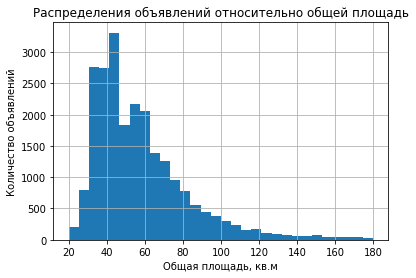

In [59]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['total_area'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['total_area'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['total_area'].median(),'\n')

#Построим гистограмму
data['total_area'].plot(kind = 'hist',grid = True,bins = 30)

plt.title ('Распределения объявлений относительно общей площадь')
plt.xlabel ('Общая площадь, кв.м')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру total_area- общая площадь**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет 57,73 кв.м
- Медианное значение равно 51.6 кв.м
- Минимальное значение общей площади: 20 кв.м., максимальное: 180 кв.м.
- Большая часть популяции находится в пределах от 30 до 70 кв.м

####  `living_area`- жилая площадь 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean        32.930672
std         16.635330
min          5.000000
25%         18.300000
50%         30.040000
75%         42.000000
max        140.000000
Name: living_area, dtype: float64 

Медианное значение:
30.04 



<function matplotlib.pyplot.show(close=None, block=None)>

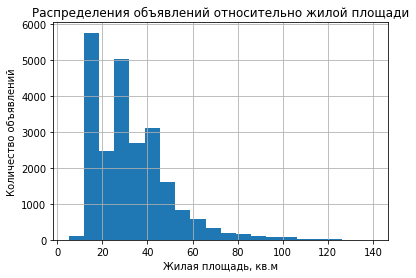

In [60]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['living_area'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['living_area'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['living_area'].median(),'\n')

#Построим гистограмму
data['living_area'].plot(kind = 'hist',grid = True,bins = 20)

plt.title ('Распределения объявлений относительно жилой площади')
plt.xlabel ('Жилая площадь, кв.м')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру living_area- жилая площадь**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет 32,93 кв.м
- Медианное значение равно 30.4 кв.м
- Минимальное значение жилой площади: 5 кв.м., максимальное: 140 кв.м.
- Большая часть популяции находится в пределах от 10 до 50 кв.м

####  `kitchen_area`- площадь кухни 

Рассмотрим данный параметр

Количество нулевых значений:
185 

Количество студий:
185 

Общая информация о данных:
count    23029.000000
mean        10.245364
std          5.053628
min          1.300000
25%          7.200000
50%          9.050000
75%         11.300000
max         93.000000
Name: kitchen_area, dtype: float64 

Медианное значение:
9.05 



<function matplotlib.pyplot.show(close=None, block=None)>

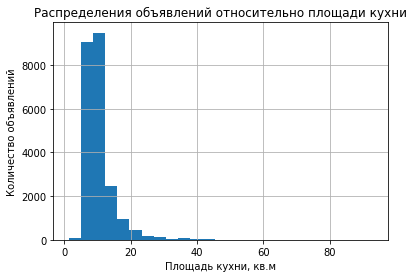

In [61]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['kitchen_area'].isnull().sum(),'\n')

#Убедимся, что к нулевым значениям относятся только квартиры-студии
print('Количество студий:')
print(len(data.query('flat_category == "студия"')['kitchen_area']),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['kitchen_area'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['kitchen_area'].median(),'\n')

#Построим гистограмму
data['kitchen_area'].plot(kind = 'hist',grid = True,bins = 25)

plt.title ('Распределения объявлений относительно площади кухни')
plt.xlabel ('Площадь кухни, кв.м')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру kitchen_area- площадь кухни**

Анализ данных показал:
- Количество нулевых значений составляет 185, что составляет количество студий в популяции (у студии кухня не выделена).
- Среднее значение составляет 10.24 кв.м
- Медианное значение равно 9.05 кв.м
- Минимальное значение общей площади: 1.3 кв.м., максимальное: 93 кв.м.
- Большая часть популяции находится в пределах от 5 до 20 кв.м

####  `last_price`- цена объекта 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    2.321400e+04
mean     5.921771e+06
std      5.280359e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      1.350000e+08
Name: last_price, dtype: float64 

Медианное значение:
4600000.0 



<function matplotlib.pyplot.show(close=None, block=None)>

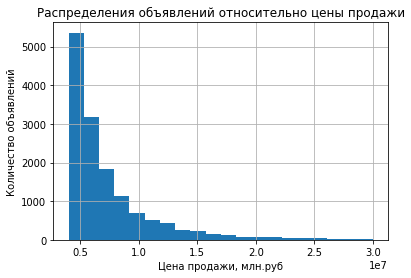

In [62]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['last_price'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['last_price'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['last_price'].median(),'\n')

#Построим гистограмму
data['last_price'].plot(kind = 'hist',grid = True,bins = 20, range = (4000000,30000000))

plt.title ('Распределения объявлений относительно цены продажи')
plt.xlabel ('Цена продажи, млн.руб')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру last_price- цена объекта**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет 5.92 млн.руб
- Медианное значение равно 4.6 млн.руб
- Минимальное значение цены составляет: 0.43 млн.руб, максимальное: 135 млн.руб
- Большая часть популяции находится в пределах от 4 до 13 млн.руб

####  `rooms`- количество комнат 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean         2.026751
std          0.978870
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64 

Медианное значение:
2.0 



<function matplotlib.pyplot.show(close=None, block=None)>

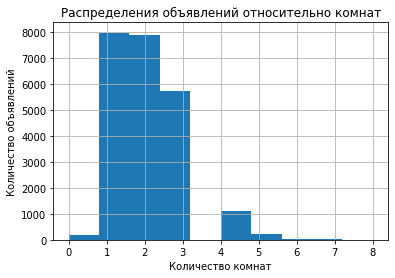

In [63]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['rooms'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['rooms'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['rooms'].median(),'\n')

#Построим гистограмму
data['rooms'].plot(kind = 'hist',grid = True,bins = 10)

plt.title ('Распределения объявлений относительно комнат')
plt.xlabel ('Количество комнат')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру rooms - количество комнат**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет - 2.
- Медианное значение равно - 2.
- Минимальное количество комнат: 0., максимальное: 8.
- Большая часть популяции находится в пределах от 1 до 3 комнат.

####  `ceiling_height`- высота потолков 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean         2.691216
std          0.207852
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64 

Медианное значение:
2.65 



<function matplotlib.pyplot.show(close=None, block=None)>

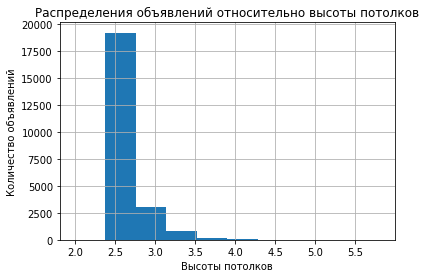

In [64]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['ceiling_height'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['ceiling_height'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['ceiling_height'].median(),'\n')

#Построим гистограмму
data['ceiling_height'].plot(kind = 'hist',grid = True,bins = 10)

plt.title ('Распределения объявлений относительно высоты потолков')
plt.xlabel ('Высоты потолков')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру ceiling_height- высота потолков**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет 2,69 м
- Медианное значение равно 2.65 кв.м
- Минимальное значение высоты потолка: 2 м., максимальное: 5.8 м.
- Большая часть популяции находится в пределах от 2.4 до 3.1 кв.м

####  `floor`- этаж квартиры 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean         5.892306
std          4.880367
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64 

Медианное значение:
4.0 



<function matplotlib.pyplot.show(close=None, block=None)>

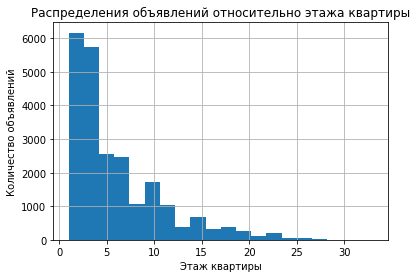

In [65]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['floor'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['floor'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['floor'].median(),'\n')

#Построим гистограмму
data['floor'].plot(kind = 'hist',grid = True,bins = 20)

plt.title ('Распределения объявлений относительно этажа квартиры')
plt.xlabel ('Этаж квартиры')
plt.ylabel ('Количество объявлений')
plt.show

 **Вывод по параметру floor- этаж квартиры**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет 6. 
- Медианное значение равно 4.
- Минимальное значение для этажей: 1., максимальное: 33.
- Большая часть популяции находится в пределах от 1 до 10 этажа

####  `floor_type`- тип этажа квартиры («первый», «последний», «другой») 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count      23214
unique         3
top       другой
freq       17108
Name: floor_type, dtype: object 



<function matplotlib.pyplot.show(close=None, block=None)>

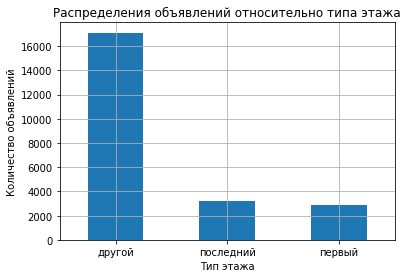

In [66]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['floor_type'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['floor_type'].describe(),'\n')

#Построим гистограмму
data['floor_type'].value_counts().plot(kind = 'bar',grid = True)

plt.xticks(rotation=0)
plt.title ('Распределения объявлений относительно типа этажа')
plt.xlabel ('Тип этажа')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру floor_type- тип этажа квартиры («первый», «последний», «другой»)**

Анализ данных показал:
- В представленных данных отстутстуют пропуски.
- Большая часть популяции представлена квартирами расположенными между первым и последним этажом.

####  `floors_total`- общее количество этажей в доме 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean        10.723917
std          6.591193
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64 

Медианное значение:
9.0 



<function matplotlib.pyplot.show(close=None, block=None)>

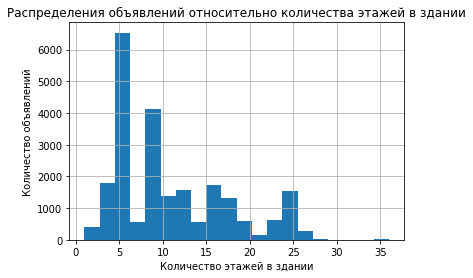

In [67]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['floors_total'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['floors_total'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['floors_total'].median(),'\n')

#Построим гистограмму
data['floors_total'].plot(kind = 'hist',grid = True,bins = 20)

plt.title ('Распределения объявлений относительно количества этажей в здании')
plt.xlabel ('Количество этажей в здании')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру floors_total- общее количество этажей в доме**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Среднее значение составляет 11 этажей
- Медианное значение равно 9 этажей
- Минимальное значение этажей в здании: 1, максимальное: 36 этажей
- Большая часть популяции находится в пределах от 5 до 13 этажей в здании

####  `cityCenters_nearest`- расстояние до центра города в метрах 

Рассмотрим данный параметр

Количество нулевых значений:
5486 

Общая информация о данных:
count    17728.000000
mean     14311.495036
std       8584.336705
min        181.000000
25%       9488.000000
50%      13171.000000
75%      16327.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64 

Медианное значение:
13171.0 



<function matplotlib.pyplot.show(close=None, block=None)>

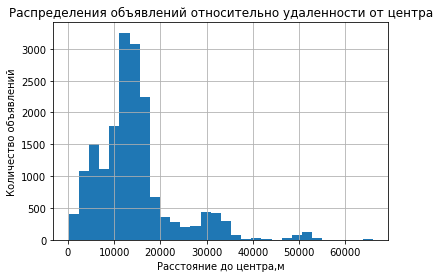

In [68]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['cityCenters_nearest'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['cityCenters_nearest'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['cityCenters_nearest'].median(),'\n')

#Построим гистограмму
data['cityCenters_nearest'].plot(kind = 'hist',grid = True,bins = 30)

plt.title ('Распределения объявлений относительно удаленности от центра')
plt.xlabel ('Расстояние до центра,м')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру cityCenters_nearest- расстояние до центра города в метрах**

Анализ данных показал:
- В представленных данных имеются пропуски. они относятся к сильно удаленным населенным пунктам, расстояние у которых не покрывается геодезической системой.

Для параметров, по которым у нас есть данные:
- Среднее значение составляет 14 311 метров.
- Медианное значение равно 13 171 метров
- Минимальное значение удаления от центра: 181 метр, максимальное: 65 968 метров.
- Большая часть популяции находится в пределах от 10 000 до 20 000 метров

####  `airports_nearest`- расстояние до ближайшего аэропорта  

Рассмотрим данный параметр

Количество нулевых значений:
5506 

Общая информация о данных:
count    17708.000000
mean     28837.076971
std      12689.261459
min       6450.000000
25%      18488.000000
50%      26876.500000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64 

Медианное значение:
26876.5 



<function matplotlib.pyplot.show(close=None, block=None)>

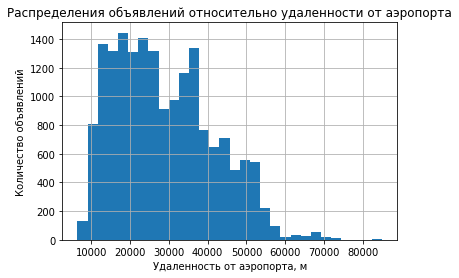

In [69]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['airports_nearest'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['airports_nearest'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['airports_nearest'].median(),'\n')

#Построим гистограмму
data['airports_nearest'].plot(kind = 'hist',grid = True,bins = 30)

plt.title ('Распределения объявлений относительно удаленности от аэропорта')
plt.xlabel ('Удаленность от аэропорта, м')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру airports_nearest- расстояние до ближайшего аэропорта**

Анализ данных показал:
- В представленных имеются пропуски, связанные с тем, что геодезическая система не покрывает всей территории.
- Среднее значение составляет 28 835 м
- Медианное значение равно 26 876 м
- Минимальное значение удаленности от аэропорта: 6450 м., максимальное: 84 869 м.
- Большая часть популяции находится в пределах от 10 000 до 50 000 м

####  `parks_nearest`- расстояние до ближайшего парка 

Рассмотрим данный параметр

Количество нулевых значений:
15404 

Общая информация о данных:
count    7810.000000
mean      491.313444
std       340.986077
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64 

Медианное значение:
456.0 



<function matplotlib.pyplot.show(close=None, block=None)>

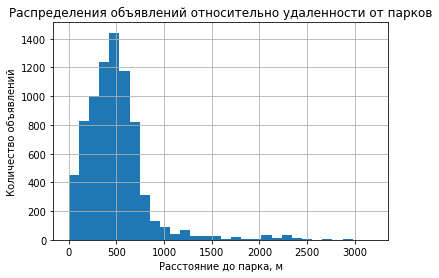

In [70]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['parks_nearest'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['parks_nearest'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['parks_nearest'].median(),'\n')

#Построим гистограмму
data['parks_nearest'].plot(kind = 'hist',grid = True,bins = 30)

plt.title ('Распределения объявлений относительно удаленности от парков')
plt.xlabel ('Расстояние до парка, м')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру total_area- общая площадь**

Анализ данных показал:
- В представленных имеются пропуски, связанные с тем, что геодезическая система не покрывает всей территории.
- Среднее значение составляет 491 метр.
- Медианное значение равно 456 метров.
- Минимальное удаление от парка: 1 метр, максимальное: 3190 метров.
- Большая часть популяции находится в пределах от 200 до 700 метров.

####  `publication_day`- день публикации объявления 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean         2.566598
std          1.788721
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_day, dtype: float64 

Медианное значение:
3.0 



<function matplotlib.pyplot.show(close=None, block=None)>

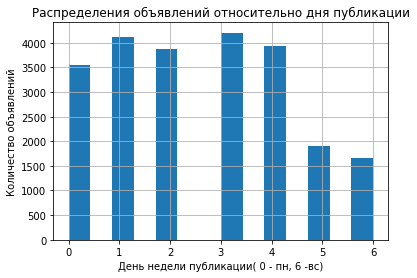

In [71]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['publication_day'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['publication_day'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['publication_day'].median(),'\n')

#Построим гистограмму
data['publication_day'].plot(kind = 'hist',grid = True,bins = 14)

plt.title ('Распределения объявлений относительно дня публикации')
plt.xlabel ('День недели публикации( 0 - пн, 6 -вс)')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру publication_day- день публикации объявления**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- Меньше всего объявлений размещали на выходных, а большую - в будние дни.

####  `publication_month`- месяц публикации объявления 

Рассмотрим данный параметр

Количество нулевых значений:
0 

Общая информация о данных:
count    23214.000000
mean         6.400362
std          3.492631
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64 

Медианное значение:
6.0 



<function matplotlib.pyplot.show(close=None, block=None)>

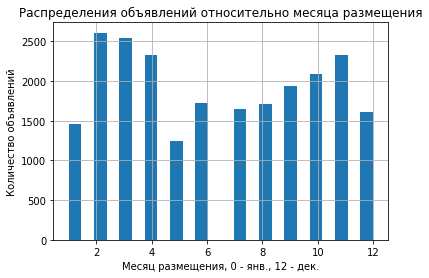

In [72]:
#Определим количество нулевых значений
print('Количество нулевых значений:')
print(data['publication_month'].isnull().sum(),'\n')

#Рассмотрим общую информацию о столбце
print('Общая информация о данных:')
print(data['publication_month'].describe(),'\n')

#Узнаем медианное значение
print('Медианное значение:')
print(data['publication_month'].median(),'\n')

#Построим гистограмму
data['publication_month'].plot(kind = 'hist',grid = True,bins = 24)

plt.title ('Распределения объявлений относительно месяца размещения')
plt.xlabel ('Месяц размещения, 0 - янв., 12 - дек.')
plt.ylabel ('Количество объявлений')
plt.show

**Вывод по параметру total_area- общая площадь**

Анализ данных показал:
- В представленных данных отсутстуют пропуски.
- чаще всего объявления публикуются в феврале и в ноябре.
- в январе, мае и декабре публикуют меньше всего объявлений.

#### Вывод по анализу предобработанных данных

Был проведен анализ по основным необходимым для исследования параметрам. По каждому параметру было определено:
- количество пустых значений;
- среднее и медианное значение (где применимо);
- максимальное и минимальное значение (где применимо);
- границы наиболее часых значений;
- построены графики.

Данные готовы для проведения исследований

### Исследование №1 - Скорость продажи квартир


Данное исследование нацелено на формирования понимания за какие временные промежутки обычно продаются квартиры.

В качестве основного анализируемого параметра выберем `days_exposition`

Посмотрим детальную информацию по данному параметру. Построим гистограмму и рассчитаем среднее и медианное значение.

Общее количество продаж
45.0      876
60.0      537
7.0       231
30.0      206
90.0      187
         ... 
987.0       1
1485.0      1
1484.0      1
793.0       1
1174.0      1
Name: days_exposition, Length: 1128, dtype: int64 

Информация о столбце
count    20115.000000
mean       179.365200
std        218.058167
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64 

Медианное значение
95.0 



<AxesSubplot:ylabel='Frequency'>

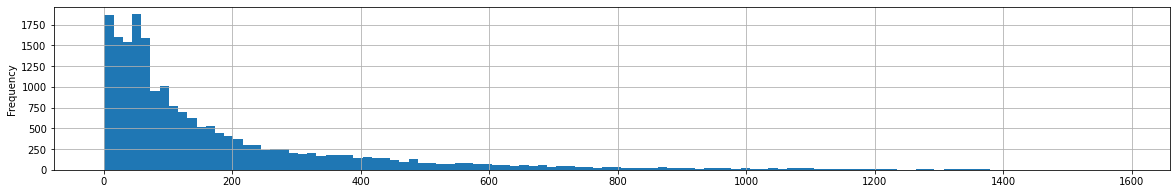

In [73]:
#Определим наиболее часто встречающиеся значения
print('Общее количество продаж')
print(data['days_exposition'].value_counts(),'\n')

#Расмотрим детальную информацию о параметре
print('Информация о столбце')
print(data['days_exposition'].describe(),'\n')

#Рассчитаем медианное значение
print('Медианное значение')
print(data['days_exposition'].median(),'\n')

#На основе исследуемого параметра построим диаграмму
data['days_exposition'].plot(kind ='hist',
                             grid = True,
                             bins = 110,
                             figsize = (20,3))

**Вывод по исследованию №1**

Чаще всего объявления находились на сайте в течении 45 дней (**4%**).

Минимальное значение составляет *1* день. На мой взгляд, все объявления меньше 3-х дней - являются аномальными скорее всего данные (может быть связано с тем, что объявление было удалено в связи с неправильной загрузкой либо продавец принял решение не продавать недвижимость, также возможно мошенничество)

Максимальное значение составляет - *1580* дней. По данному объявлению скорее всего могло быть выставлено не самое ликвидное жилье, либо жилье имеет завышенную цену.

В среднем объявления снимались с публикации по прошествии **179** дней. Медианным значением является **95** дней. В данном случае лучше полагаться на медианное значение, так как оно отражает значение без учета сильно отклоняющихся от среднего значения вариантов.

На основе этого можно сделать следующие выводы:

- К **быстрым** продажам стоит отнести объявления, со сроком менее 45 дней.

- Продажи со **средним** сроком находятся в диапазоне от 45 до 150 дней.

- В случае если объявление размещено более 150 дней - его можно отнести к категории **медленные**.

Для `пользователей` можно применить следующие рекомендации: если объявление можно классифицировать как медленное, то возможно стоит рассмотреть более детально параметры объявления - возможно стоит изменить цену, или добавить больше информации.

Для `сервиса` рекомендуется присматриваться к объявлениям с очень быстрым сроком - **до 7-ми дней**, в случае если пользователь публикует и удаляет такие объявления, возможно он является **мошенником**.

### Исследование №2 - Факторы, влияющие на общую стоимость объекта

В рамках данного исследования будут рассмотрены разные параметры и определено как эти параметры влияют на стоимость объекта.

Стоимость объекта хранится в параметре `last_price`, анализируемые параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа;
- даты размещения (день недели, месяц, год).

In [74]:
#для отбора информации для анализируемых параметров создадим список
list_id = ['last_price','total_area','living_area','kitchen_area','rooms','floor_type','publication_day','publication_month','publication_year']

#извлечем анализируемые параметры в отдельный датафрейм
data_analysis = data[list_id]

#рассмотрим корреляцию цены и анализируемых параметров
data_analysis.corr().head(1)

,last_price,total_area,living_area,kitchen_area,rooms,publication_day,publication_month,publication_year
last_price,1.0,0.713556,0.570713,0.542119,0.415824,-0.012621,0.00495,-0.042689


Из проведенного анализа видно, что на цены квартиры влияют:

**Наиболее сильно:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;

**Слабая зависимость:**
- даты размещения (день недели, месяц, год)

При этом параметр *тип этажа* не входит в анализируемые данные, так как имеет тип *object*.

Построим графики по анализируемым параметрам.

<function matplotlib.pyplot.show(close=None, block=None)>

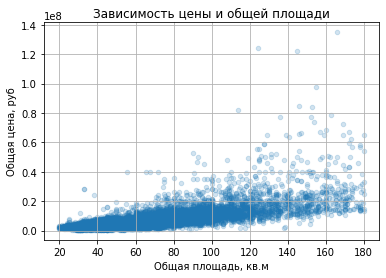

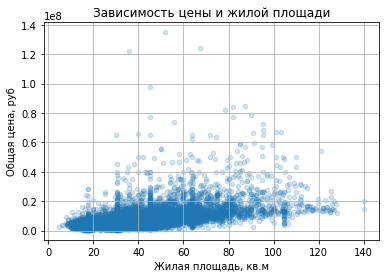

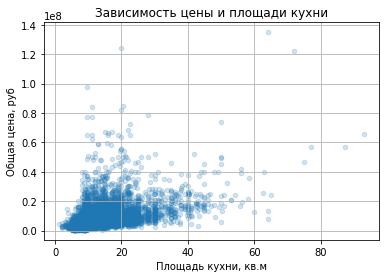

In [75]:
#Зависимость цены и общей площади
data_analysis.plot(kind = 'scatter',x = 'total_area', y = 'last_price', alpha = 0.2, grid = True, 
                   title = 'Зависимость цены и общей площади')
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Общая площадь, кв.м')
plt.show

#Зависимость цены и жилой площади'
data_analysis.plot(kind = 'scatter',x = 'living_area', y = 'last_price', alpha = 0.2, grid = True, 
                   title = 'Зависимость цены и жилой площади')
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Жилая площадь, кв.м')
plt.show

#Зависимость цены и площади кухни
data_analysis.plot(kind = 'scatter',x = 'kitchen_area', y = 'last_price', alpha = 0.2, grid = True, 
                   title = 'Зависимость цены и площади кухни')
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Площадь кухни, кв.м')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

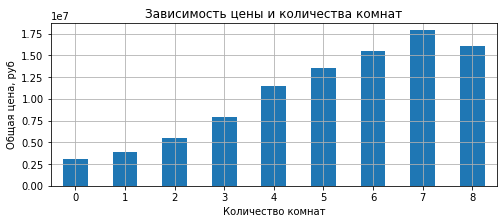

In [76]:
#Зависимость цены и кол-ва комнат
data_analysis.groupby('rooms')['last_price'].mean().plot(kind='bar', figsize=(8, 3), grid = True, 
                                                         title = 'Зависимость цены и количества комнат')

plt.xticks(rotation=0)
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Количество комнат')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

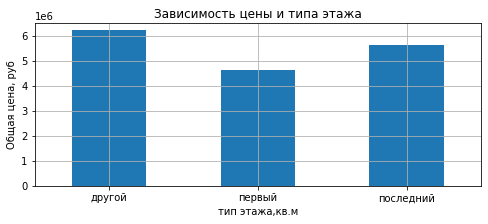

In [77]:
#Зависимость цены и типа этажа
data_analysis.groupby('floor_type')['last_price'].mean().plot(kind='bar', figsize=(8, 3), grid = True, 
                                                              title = 'Зависимость цены и типа этажа')

plt.xticks(rotation=0)
plt.ylabel ('Общая цена, руб')
plt.xlabel ('тип этажа,кв.м')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

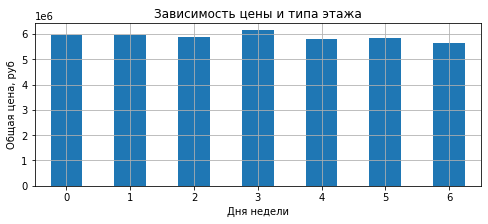

In [78]:
#Зависимость цены и дня недели
data_analysis.groupby('publication_day')['last_price'].mean().plot(kind='bar', figsize=(8, 3), grid = True, 
                                                                   title = 'Зависимость цены и типа этажа')

plt.xticks(rotation=0)
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Дня недели')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

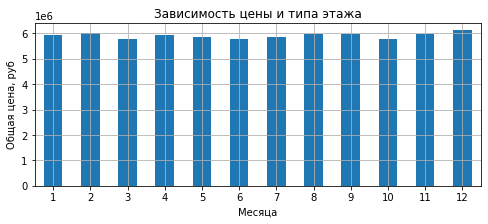

In [79]:
#Зависимость цены и дня недели
data_analysis.groupby('publication_month')['last_price'].mean().plot(kind='bar', figsize=(8, 3), grid = True, 
                                                                     title = 'Зависимость цены и типа этажа')

plt.xticks(rotation=0)
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Месяца')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

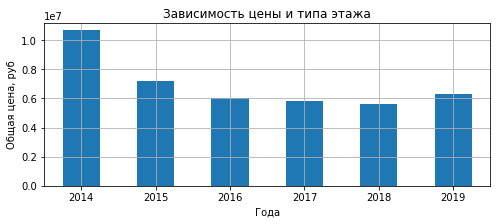

In [80]:
#Зависимость цены и дня недели
data_analysis.groupby('publication_year')['last_price'].mean().plot(kind='bar', figsize=(8, 3), grid = True, 
                                                                    title = 'Зависимость цены и типа этажа')

plt.xticks(rotation=0)
plt.ylabel ('Общая цена, руб')
plt.xlabel ('Года')
plt.show

**Вывод по исследованию №2**

В рамках данного исследования были проанализировано влияние нескольких параметров на стоимость недвижимости.

Была выявлено, что сильнее всего на стоимость жилой недвижимости влияют 4 параметра:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;

При этом параметры **жилая площадь** и **площадь кухни** входят в параметр **общей площади**.

Таким образом можно утверждать, что больше всего на стоимость жилья влияют параметры площади недвижимости и количество комнат, что также отражается на построенных графиках.

При этом видно, что с увеличением значения параметра влияние на стоимость уменьшается, это связано с двумя факторами:
1. Фактор масштаба - с увеличением масштаб квартиры сокращается ее полезная площадь в %%, так как в больших квартирах, как правило больше коридоров и хоз.помещений.
2. Квартиры с большей площадью и соответственно кол-вом комнат, как правило, доступны не всем, соответственно покупок таких квартир куда меньше.

При анализа параметра **тип этажа** было установлено, что квартиры, расположенные на первом и последнем этажах пользуются меньшей привлекательностью. это связано с тем, что квартиры на последнем этаже обладают повышенной промерзаемостью, а квартиры на первом, могут иметь просматриваемость с улицы, а также более высокую нагрузку на трубопроводную систему.

Что касается параметров размещения объявления - данные параметры слабо связаны со стоимостью недвижимости, что подтверждается как коэффициентом Пирсона, так и слабость связи видно на графиках. При этом наиболее сильной зависимостью обладает параметр "Дата размещения - год".


### Исследование №3 - Среднее значение кв.м в топ 10 населенных пунктах

В рамках данного исследования будут рассмотрены первые 10 населенных пунктов с наибольшим числом объявлений и по данным пунктам будет получена средняя стоимость одного квадратного метра.

Также будут проанализированы топ-5 населенных пунктов с самой высокой стоимстью квадратного метра и с самой низкой.

выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [82]:
#создадим датафрейм, который будет содержать наименование населенного пункта и среднюю стоимость 1 кв.м жилья
locality_name_cost_1sqm =data.pivot_table(index = 'locality_name',
                values = 'cost_1sqm',
                aggfunc = 'mean').reset_index().sort_values(by = 'cost_1sqm',ascending = False).reset_index(drop=True)

#создадим список топ-10 населенных пунктов по колличеству объявлений
top_10_filter_list = data['locality_name'].value_counts().head(10).reset_index()
top_10_filter_list.columns = ['locality_name','locality_name_ad_count']
top_10_filter_list = top_10_filter_list['locality_name'].unique()

#отфильтруем таблицу со средней стоимостью кв.м по списку с топ-10 населенными пунктами
top_10_locality_name_cost_1sqm = locality_name_cost_1sqm.query("locality_name.isin(@top_10_filter_list)")
top_10_locality_name_cost_1sqm

,locality_name,cost_1sqm
1,Санкт-Петербург,113089.753166
3,Пушкин,103001.416035
8,Кудрово,95260.846171
9,поселок Парголово,90332.263023
11,Мурино,86041.116064
20,поселок Шушары,78529.235071
26,Колпино,75333.295801
46,Гатчина,68746.146763
47,Всеволожск,68654.473986
72,Выборг,58075.893731


In [83]:
#выведем на экран топ-5 населенных пунктов с самыми высокими и самыми низкими значениями средней стоимости кв.м
locality_name_cost_1sqm

,locality_name,cost_1sqm
0,Зеленогорск,117810.585243
1,Санкт-Петербург,113089.753166
2,поселок Репино,104238.614786
3,Пушкин,103001.416035
4,Сестрорецк,102107.818481
...,...,...
315,поселок Совхозный,12629.129129
316,деревня Выскатка,12335.480902
317,деревня Вахнова Кара,11688.311688
318,поселок станции Свирь,11481.481481


**Вывод по исследованию №3**

Мы проанализировали топ-10 населенных пунктов по количеству объявлений и определили среднюю стоимость 1 кв.м в данных населенных пунктах.

На первом месте расположен г. Санкт-Петербург, так как это крупный город, логично, что объявлений для него будет больше. Из всего списка г. Санкт-Петербург имеет большую среднюю стоимость кв.м недвижимости.

На следующих местах расположились населенные пункты - спутники Санкт-Петербурга:
- Пушкин - город-спутник, расположен южнее Санкт-Петербурга;
- Кудрово, Парголово, Мурино - населенные пункты непосредственно премыкающие к Санкт-Петербургу и имеющие соответствующие станции метро - в данных населенных пунктах размещена основная жилая застройка г. Санкт-Петербург.
- Шушары - расположены между Пушкином и Санкт-Петербургом;
- Колпино, Гатчино, Всеволожск и Выборг - ближайшие города, расположенные в близи Санкт-Петербурга.

Таким образом в ТОП-10 входит как самый крупный город анализируемой популяции, так и близлежащие населенные пункты.

**Анализ ТОП-5 по средней стоимости кв.м**

ТОП-5 по наибольшей стоимости кв.м занимает как сам г. Санкт-Петербург и Пушкин, так и другие города с высоким уровнем жизни.

Например Сестрорец, Зеленогорск и Репено - можно отнести к более элитным населенным пунктам расположенным в приморской части, вдоль залива. Данные районы считаются курортными и, как правило, их выбирают люди с более высоким дотатком, также на стоимость здесь влияет наличие в доступности береговой линии финского залива. 

ТОП-5 по наименьшей стоимости кв.м занимают небольшие поселения, достаточно сильно удаленные от инфраструктурных центов. С невысоким количеством жителей и низким уровнем жилой застройки - представители этой категории представлены небольшими деревнями.

### Исследование №4 - Среднее значение стоимости по КМ

В рамках данного исследования будет получена информация о влияние стоимости жилья на удаление от центра г. Санкт-Петербург. Будет проанализирован параметр средней стоимости 1 кв.м

In [84]:
#Округлим все значения вверх - т.к. 500м. до центра входит в значения 1км и запишем в новый столбец.
data['round_km'] = data['center_distance_km'].apply(np.ceil)

#создаим переменную, которая будет содержать информацию только о г. Санкт-Петербург.
cost_from_centre = data.query('locality_name == "Санкт-Петербург"')

#На основе нового столбца и средней стоимости 1 кв.м построим сводную таблицу
cost_from_centre_pivot = cost_from_centre.pivot_table(index = 'round_km',
                            values = 'cost_1sqm',
                            aggfunc = 'mean').reset_index()

cost_from_centre_pivot

,round_km,cost_1sqm
0,1.0,171536.365546
1,2.0,144808.377528
2,3.0,137400.786905
3,4.0,122441.734105
4,5.0,135458.720705
5,6.0,142660.291508
6,7.0,148869.529921
7,8.0,138407.266435
8,9.0,119596.937435
9,10.0,110208.547870


<function matplotlib.pyplot.show(close=None, block=None)>

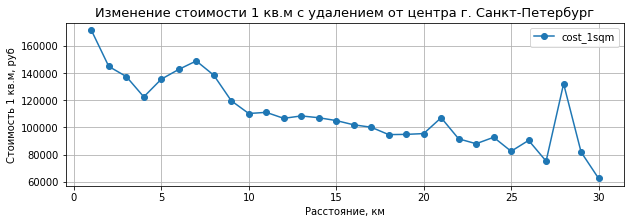

In [85]:
#Построим график по имеющимся данным
cost_from_centre_pivot.plot(x = 'round_km', y= 'cost_1sqm', style = 'o-', grid = True, figsize = (10,3))


plt.title("Изменение стоимости 1 кв.м с удалением от центра г. Санкт-Петербург", size =13)
plt.xlabel("Расстояние, км", size = 10)
plt.ylabel("Стоимость 1 кв.м, руб", size = 10)
plt.show

**Вывод по исследованию №4**

Как видно по полученным данным, стоимость недвижимости в Санкт-Петербурге имеет обратную зависимость от удаления от центра города. 

На данных видно что с увеличением расстояния от центра города стоимость среднего квадратного метра уменьшается. 

### Общий вывод

В рамках данного проекта была произведена работа по нескольким блокам:

**Анализ данных**

Были проанализированы параметры входящие в датафрейм, выявлены аномальные значения в данных, пропуски и ошибки в типах данных. По результатам анализа был предложен план по предобработке данных.

**Предобработка данных**

В рамках данного блока были обработаны данные согласно плану из предыдущего блока. Также были добавлены новые параметры, которые участвовали в дальнейшем исследовании.

**Исследовательский анализ**

В данном блоке на основе предобработанных данных были проведены 4 исследования:

1. Скорость продажи квартир

В рамках данного исследования было выявлено что в обычно объявление о продаже недвижимости находится на сайте в течении 95 дней, среднее значение составляет 179 дней, при этом больше всего объявлений (4%) снимались с публикации через 45 дней.

Была сформулирована градация объявлений:
 - быстрые продажи менее 45 дней;
 - средний срок от 45 до 150;
 - долгие - более 150 дней

Детали смотрите в блоке 3.1
2. Факторы, влияющие на общую стоимость объекта

В рамках данного исследования было определено, что сильнее всего на стоимость квартиры влияют параметры:

- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;

При анализа параметра **тип этажа** было установлено, что квартиры, расположенные на первом и последнем этажах пользуются меньшей привлекательностью.

А дата и время размещения объявлений слабо влияют на стоимостью недвижимости.

Детали смотрите в блоке 3.2

3. Среднее значение кв.м в топ 10 населенных пунктах

В рамках данного исследования были проанализированы значения средней стоимости квадратных метров в населенных пунктах с самым большим количеством объявления. На первых местах находятся объявления из г. Санкт-Петербург и ближайших населенных пунктов. 

Также были проанализированы населенные пункты с самым высоким и самым низким показателем стоимости 1 кв.м.
Самые высокие показатели отмечены в г. Санкт-Петербурге, г. Пушкине и населенных пунктах курортного района Ленинградской области.

Самые низкие показатели - в небольших удаленных населенных пунктах с невысоким уровнем застройки жилого массива.

Детали смотрите в блоке 3.3

4. Среднее значение стоимости по КМ

В рамках данного исследования было проанализировано изменений средняя стоимость 1кв.м в г. Санкт-Петербурге с учетом удаления от центра города. 

Была подтверждена устойчивая взаимосвязь - чем дальше объект недвижимости расположен от центра города, чем ниже средняя стоимость 1 кв.м.

**Среднестатистическое объявление**

На основе проанализированных данных можно выделить основные параметры продажи среднестатистической квартиры - в качестве анализируемых значений были выбраны медианные значения, так как они лучше отображают усредненное значение параметров

Среднестатистическая квартира обладает следующими значениями:
- `total_area`- общая площадь: 51.6 кв.м; 
- `living_area`- жилая площадь: 30 кв.м;
- `kitchen_area`- площадь кухни: 9.05 кв.м;
- `last_price`- цена объекта: 4 600 тыс. руб.
- `rooms`- количество комнат: 2;
- `ceiling_height`- высота потолков: 2.65;  
- `floor`- этаж квартиры: 4; 
- `floor_type`- тип этажа квартиры («первый», «последний», «другой»): другой;  
- `cityCenters_nearest`- расстояние до центра города в метрах: 13 км.  
- `parks_nearest`- расстояние до ближайшего парка: 456 метров 

Таким образом можно сказать, что среднестатистическая квартира представлена 2-х комнатной квартирой, расположенной не на первом и не на последнем этаже, в ближайшей доступности есть парк и средняя стоимость такой квартиры составляет по состоянию на момент среза данных (2019) год - около 4 600 тыс. рублей.


**Рекомендации:**

В рамках данной работы необходимо было проанализировать данные сервиса по поиску недвижимости.

Можно дать следующие рекомендации для оптимизации обработки информации:
- по важным параметрам, таким как общая площадь, населенный пункт и т.д., не давать размещать объявления в случае пропусков в этих данных.
- в случае отсутствие в ближайшей доступности парков, водоемов и аэропорта - автоматически присваивать значение "нет в ближайшей доступности", а количество в пределах 3км устанавливать = "0"
- геодезическая система покрывает преимущественно Санкт-Петербург и ближайшие районы, ее необходимо расширить, для формирования информации о налчии парков и водоемов в отдаленных населенных пунктах.

Также можно выделить несколько рекомендаций по поиску мошеннических объявлений:
- необходимо присмотреться к объявлениям с высокой площадью недвижимости и низкой стоимости кв.м. - нетипичной для данного населенного пункта;
- также стоит обратить внимание на объявления с коротким сроком размещения от одного пользователя.